<a href="https://www.kaggle.com/code/dibkb9/disaster-tweets?scriptVersionId=172735790" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [3]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8d1e85e3-ffae-ecc6-67cd-22cca19e912b)
GPU 1: Tesla T4 (UUID: GPU-3182d2f2-a406-3cd2-c6fb-3e03df056034)


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_34/1948985775.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [5]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


Total no of disaster tweets:  4342
Percent of disaster tweets:  57.03%


Total no of non-disaster tweets:  3271
Percent of non-disaster tweets:  42.97%


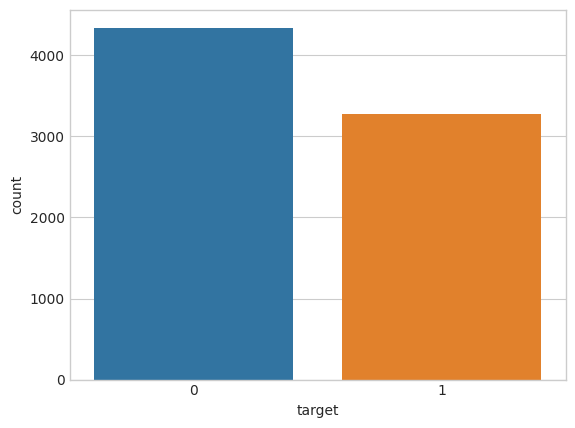

In [7]:
sns.countplot(train_df, x="target")
cnt = train_df['target'].value_counts()
print("Total no of disaster tweets: ",cnt[0])
print("Percent of disaster tweets: ",f'{cnt[0]/len(train_df)*100:.2f}%')
print("\n")
print("Total no of non-disaster tweets: ",cnt[1])
print("Percent of non-disaster tweets: ",f'{cnt[1]/len(train_df)*100:.2f}%')

In [8]:
import random
start_range = 0
end_range = len(train_df)
random_list = list(random.sample(range(start_range, end_range + 1), 6))
for i in random_list:
    row = train_df.iloc[i]
    print("Label ", row['target'], "(real disaster)" if row['target'] == 1 else "(not real disaster)")
    print("Text \n",row['text'])
    print("--"*21,'\n')
    

Label  0 (not real disaster)
Text 
 Police walk up on me I be blowin smoke in dey face  wanna lock me up cus I got dope shit is gay
------------------------------------------ 

Label  1 (real disaster)
Text 
 Russian 'food crematoria' provoke outrage amid crisis famine memories http://t.co/GyH00mRKjm
------------------------------------------ 

Label  0 (not real disaster)
Text 
 Check out this amazing footage of lightning filmed while lifting off from Chicago... http://t.co/AOg5chjmVs http://t.co/cLN2SXzY1Z
------------------------------------------ 

Label  0 (not real disaster)
Text 
 ÛÏParties and body bags go together like drinking and driving.Û
------------------------------------------ 

Label  1 (real disaster)
Text 
 The Latest: More homes razed by Northern California wildfire - http://t.co/nTSwUAYEJI http://t.co/wgeFBuk4Jk
------------------------------------------ 

Label  1 (real disaster)
Text 
 #LatestNews: Tension In Bayelsa As Patience Jonathan Plans To Hijack APC PD

In [9]:
train_df.iloc[1]

id                                               4
keyword                                        NaN
location                                       NaN
text        Forest fire near La Ronge Sask. Canada
target                                           1
Name: 1, dtype: object

#### Number of characters present in each tweet

<Axes: >

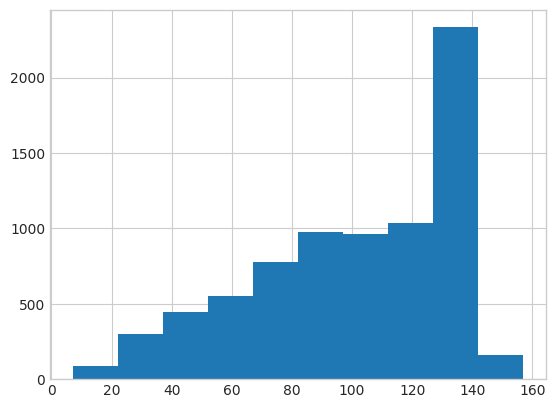

In [10]:
train_df['text'].str.len().hist()

In [11]:
train_df['char_len'] = train_df['text'].apply(len)

In [12]:
train_df

,id,keyword,location,text,target,char_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


Text(0.5, 1.0, 'Disaster tweets')

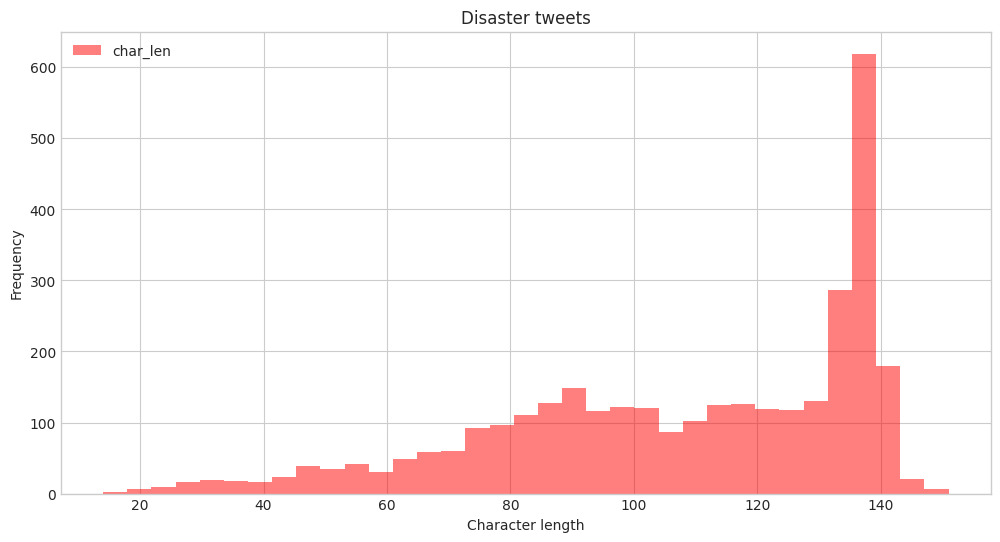

In [13]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==1]['char_len'].plot(bins=35, kind='hist', color='red',alpha=.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Disaster tweets")

Text(0.5, 1.0, 'Non Disaster tweets')

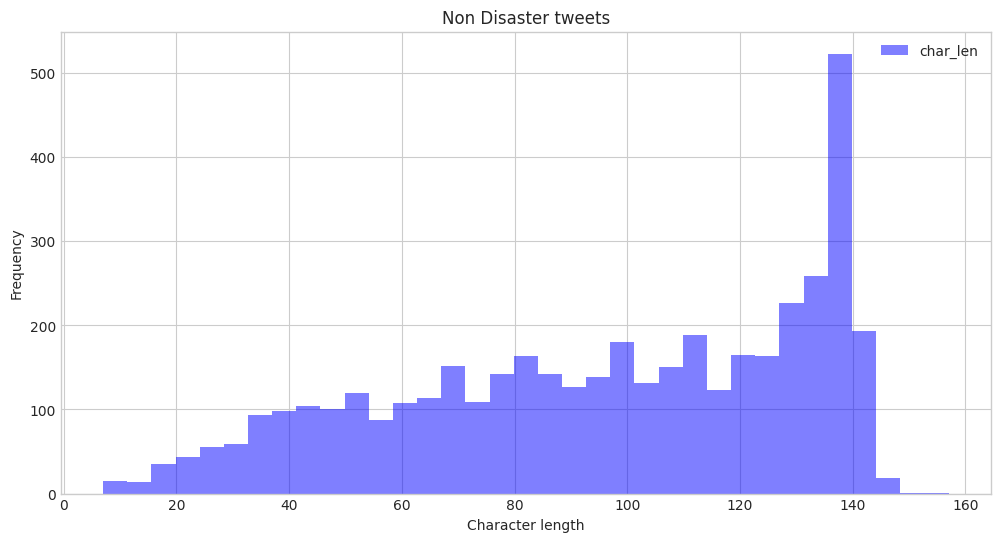

In [14]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==0]['char_len'].plot(bins=35, kind='hist', color='blue',alpha=.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Non Disaster tweets")

#### Number of words present in each tweet

In [15]:
train_df['word_len'] = train_df['text'].str.split().map(lambda x: len(x))

<Axes: >

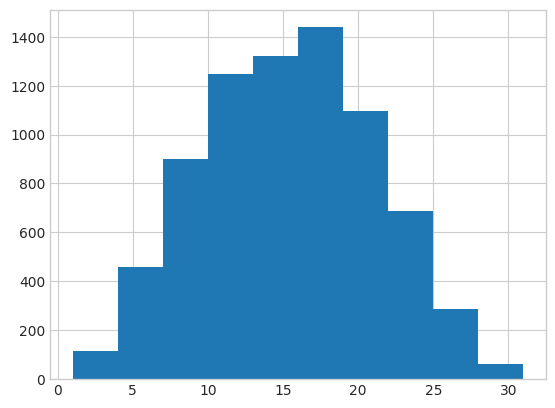

In [16]:
train_df['text'].str.split().map(lambda x: len(x)).hist()

Text(0.5, 1.0, 'Disaster tweets')

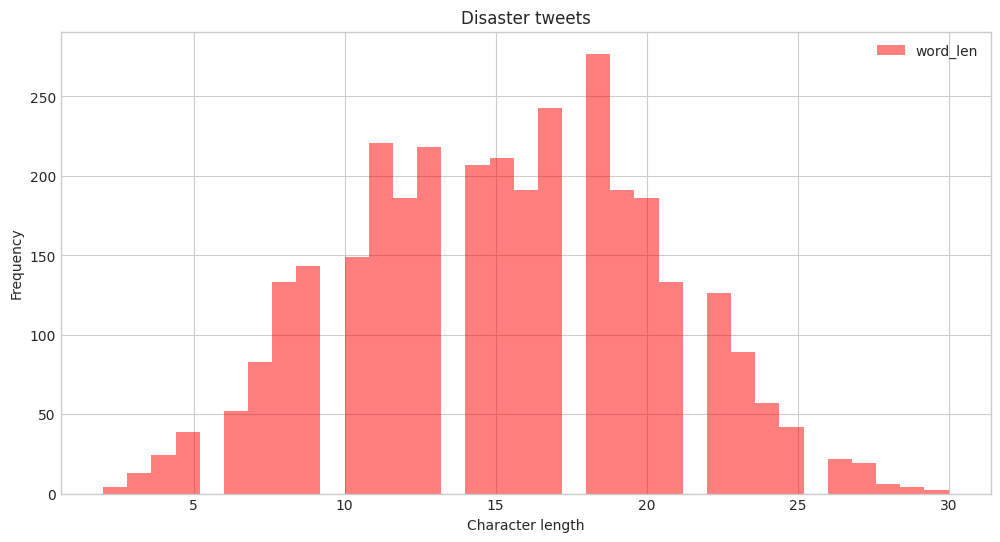

In [17]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==1]['word_len'].plot(bins=35, kind='hist', color='red',alpha=0.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Disaster tweets")

Text(0.5, 1.0, 'Non Disaster tweets')

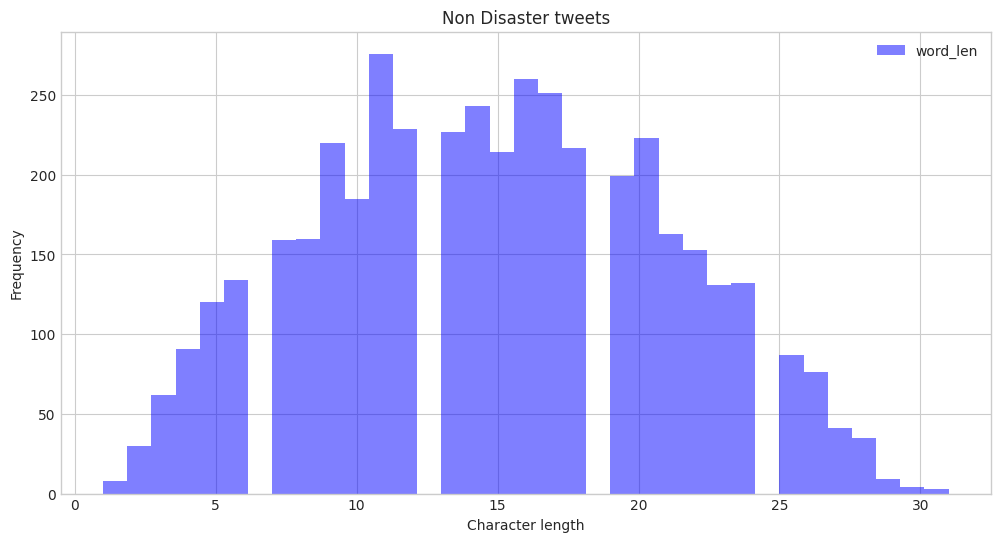

In [18]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==0]['word_len'].plot(bins=35, kind='hist', color='blue',alpha=0.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Non Disaster tweets")

#### Descriptive Statistics

In [19]:
print("Disaster tweets \n")
train_df[['char_len', 'word_len']][train_df.target==1].describe().T

Disaster tweets 



,count,mean,std,min,25%,50%,75%,max
char_len,3271.0,108.113421,29.309854,14.0,88.0,115.0,136.0,151.0
word_len,3271.0,15.167533,5.096806,2.0,11.0,15.0,19.0,30.0


In [20]:
print("Non Disaster tweets \n")
train_df[['char_len', 'word_len']][train_df.target==0].describe().T

Non Disaster tweets 



,count,mean,std,min,25%,50%,75%,max
char_len,4342.0,95.706817,35.885924,7.0,68.0,101.0,130.0,157.0
word_len,4342.0,14.704744,6.161564,1.0,10.0,15.0,19.0,31.0


In [21]:
train_df['contains_link'] = train_df['text'].str.contains("https")
contains_link = train_df[(train_df["contains_link"] == True)]['target'].value_counts()
print("Disaster tweets that contains a link in the text body ", contains_link[1],'\n')
print("Non Disaster tweets that contains a link in the text body ", contains_link[0],'\n')

Disaster tweets that contains a link in the text body  134 

Non Disaster tweets that contains a link in the text body  273 



#### Stop words

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
corpus=[]
text = train_df['text'].str.split()
text = text.values.tolist()
corpus=[word for i in text for word in i]

from collections import defaultdict
dic=defaultdict(int)
non_dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
    if word not in stop:
        non_dic[word]+=1

In [24]:
stop_words_cnt = pd.DataFrame(list(dic.items()), columns=['word', 'count'])
nonstop_words_cnt = pd.DataFrame(list(non_dic.items()), columns=['word', 'count'])

In [25]:
def plotwords(df,cnt=15):
    df = df.sort_values(by='count', ascending=False)[:cnt]
    plt.figure(figsize=(18, 6))
    sns.barplot(x='word', y='count', data=df)
    # Add labels to the bars
    ax = plt.gca()
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')

    # Customize plot
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show plot
    plt.tight_layout()
    plt.show()

#### Top 15 stop words

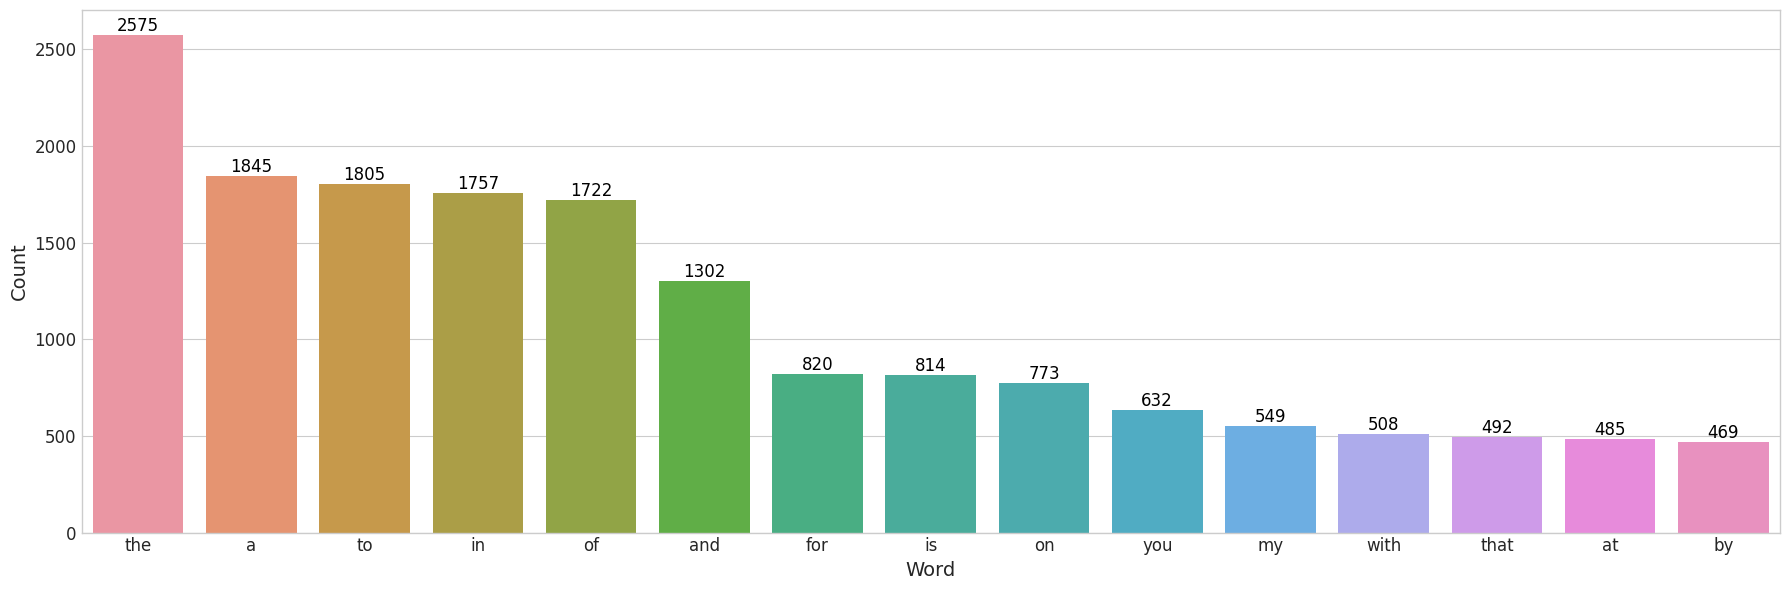

In [26]:
plotwords(stop_words_cnt)

#### Top 15 non-stop words

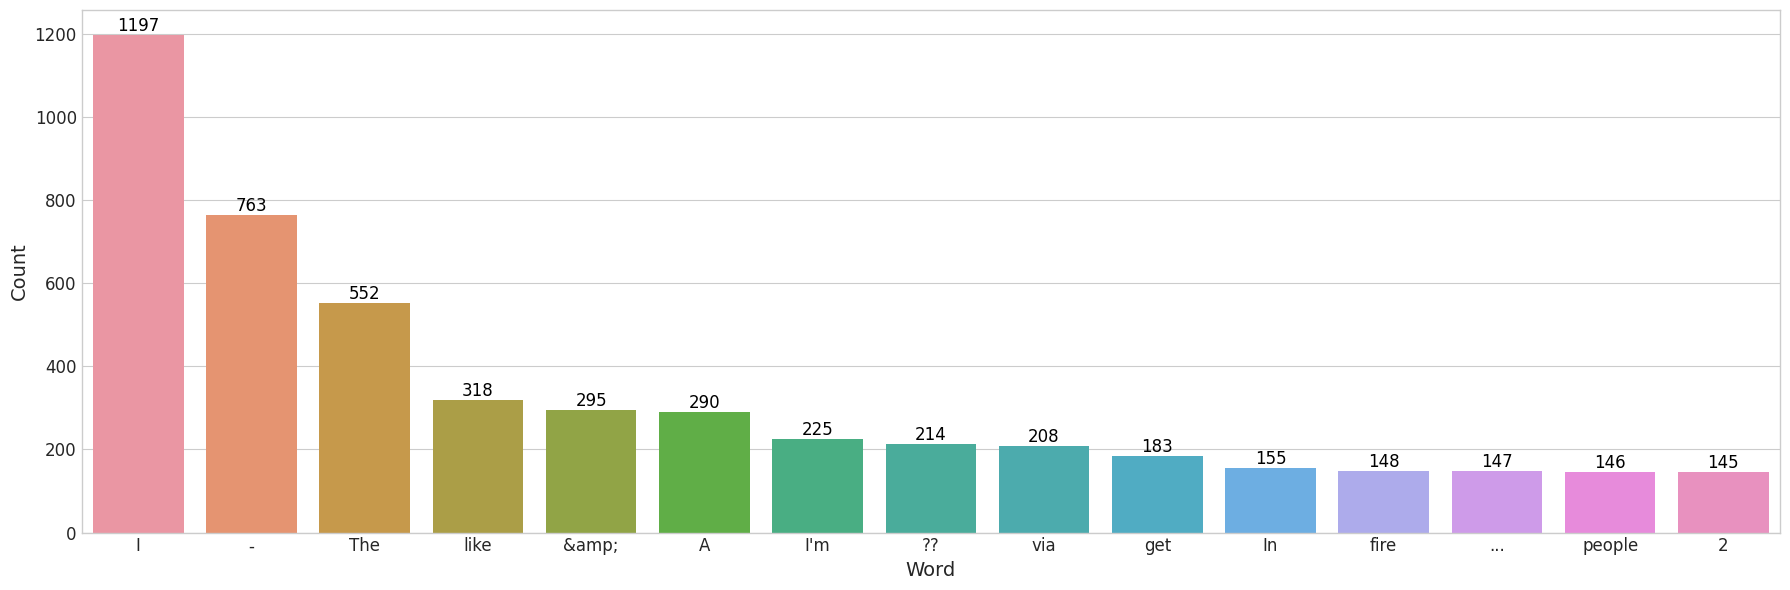

In [27]:
plotwords(nonstop_words_cnt)

In [28]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []

    for t in text.split(" "):
        t = '' if t.startswith('@') and len(t) > 1 else t
        t = '' if t.startswith('http') else t
        t = t.replace("#","")
        new_text.append(t.lower())
    return " ".join(new_text).strip().replace("  ", " ")

In [29]:
train_df['text'] = train_df['text'].apply(preprocess)
test_df['text'] = test_df['text'].apply(preprocess)
train_df.head()

,id,keyword,location,text,target,char_len,word_len,contains_link
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,69,13,False
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,7,False
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,133,22,False
3,6,NaN,NaN,"13,000 people receive wildfires evacuation ord...",1,65,8,False
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,88,16,False


##### Remove html tags (if any)

In [30]:
from bs4 import BeautifulSoup

In [31]:
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

train_df['text'] = train_df['text'].apply(remove_html_tags)
test_df['text'] = test_df['text'].apply(remove_html_tags)

/tmp/ipykernel_34/3375023448.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


##### Standardizing Accent Characters

In [32]:
import unicodedata
def standardize_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

train_df['text'] = train_df['text'].apply(standardize_accented_chars)
test_df['text'] = test_df['text'].apply(standardize_accented_chars)

In [33]:
import re 

def remove_url(text):
    return re.sub(r'https?:\S*', '', text)
train_df['text'] = train_df['text'].apply(remove_url)
test_df['text'] = test_df['text'].apply(remove_url)

##### Expanding contractions

In [34]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.2 MB/s eta 0:00:00


In [35]:
import contractions
def expand_contractions(text):
    expanded_words = [] 
    for word in text.split():
        expanded_words.append(contractions.fix(word)) 
    return ' '.join(expanded_words)

train_df['text'] = train_df['text'].apply(expand_contractions)
test_df['text'] = test_df['text'].apply(expand_contractions)

#### Removing tags and mentions

In [36]:
def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)

train_df['text'] = train_df['text'].apply(remove_mentions_and_tags)
test_df['text'] = test_df['text'].apply(remove_mentions_and_tags)

##### Removing Special Characters

In [37]:
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

train_df['text'] = train_df['text'].apply(remove_special_characters)
test_df['text'] = test_df['text'].apply(remove_special_characters)

##### Removing Digits

In [38]:
def remove_numbers(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

train_df['text'] = train_df['text'].apply(remove_numbers)
test_df['text'] = test_df['text'].apply(remove_numbers)

##### Removing Puncuations

In [39]:
import string
def remove_punctuation(text):
    return ''.join([c for c in text if c not in string.punctuation])

train_df['text'] = train_df['text'].apply(remove_punctuation)
test_df['text'] = test_df['text'].apply(remove_punctuation)

##### Lemmatisaton

In [40]:
import spacy
nlp = spacy.load("en_core_web_sm")
def lemmatize(text):
    doc = nlp(text)
    lemmatized_text = []
    for token in doc:
        lemmatized_text.append(token.lemma_)
    return " ".join(lemmatized_text)
train_df['text'] = train_df['text'].apply(lemmatize)
test_df['text'] = test_df['text'].apply(lemmatize)

In [41]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
def remove_stopwords(text):       
    filtered_sentence =[] 
    doc=nlp(text)
    for token in doc:
        if token.is_stop == False: 
            filtered_sentence.append(token.text)   
    return " ".join(filtered_sentence)

train_df['text'] = train_df['text'].apply(remove_stopwords)
test_df['text'] = test_df['text'].apply(remove_stopwords)

#### Train-val split

In [60]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df["text"].to_numpy(),
                                                                            train_df["target"].to_numpy(),
                                                                            test_size=0.2,
                                                                            random_state=42) 

In [61]:
train_sentences

array(['courageous honest analysis need use atomic bomb    hiroshima japanese military refuse surrender',
       'wld b shame golf cart engulf flame boycottbear',
       'tell rescind medal honor soldier massacre wound knee sign    rt',
       ...,
       'omron hemc automatic blood pressure monitor standard large bp cuff',
       'official quarantine place alabama home possible ebola case develop symptom',
       'england year ago today whirlwind time'], dtype=object)

#### Vectorization and Embeddings

In [62]:
# average words
avg_words = round(train_df[['char_len', 'word_len']][train_df.target==1].describe()['word_len']['mean'])
avg_words

15

In [63]:
import tensorflow as tf
from keras.layers import TextVectorization
max_vocab_length = 10000
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=avg_words)

In [64]:
text_vectorizer.adapt(train_sentences)

In [65]:
# Create sample sentence and tokenize it
example_sentences = ["Just felt a huge earthquake. Stay safe everyone! #earthquake #safety",
                     "Evacuation orders issued as wildfire approaches our neighborhood. Praying for everyone's safety. #wildfire #evacuation",
                     "Massive flooding in the area. Roads are impassable. Stay indoors and stay safe. #flood #safety"]
for s in example_sentences:
    print(s,'\n')
    print(text_vectorizer([s]),'\n')
    print("-"*64,'\n')

Just felt a huge earthquake. Stay safe everyone! #earthquake #safety 

tf.Tensor(
[[   1    1    1  631  157  447 1284    1  157  657    0    0    0    0
     0]], shape=(1, 15), dtype=int64) 

---------------------------------------------------------------- 

Evacuation orders issued as wildfire approaches our neighborhood. Praying for everyone's safety. #wildfire #evacuation 

tf.Tensor(
[[ 180 2530    1    1   67    1    1 3567    1    1    1  657   67  180
     0]], shape=(1, 15), dtype=int64) 

---------------------------------------------------------------- 

Massive flooding in the area. Roads are impassable. Stay indoors and stay safe. #flood #safety 

tf.Tensor(
[[1308  392    1    1  219    1    1    1  447    1    1  447 1284   25
   657]], shape=(1, 15), dtype=int64) 

---------------------------------------------------------------- 



In [66]:
tf.random.set_seed(42)
from keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_shape=(avg_words,),
                             name="embedding_1") 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
for s in example_sentences:
    print(s,'\n')
    print(embedding(text_vectorizer([s])),'\n')
    print("-"*64,'\n')

Just felt a huge earthquake. Stay safe everyone! #earthquake #safety 

tf.Tensor(
[[[-0.01853044 -0.02579577 -0.00229131 ...  0.02372183  0.00271595
   -0.03664767]
  [-0.01853044 -0.02579577 -0.00229131 ...  0.02372183  0.00271595
   -0.03664767]
  [-0.01853044 -0.02579577 -0.00229131 ...  0.02372183  0.00271595
   -0.03664767]
  ...
  [-0.03065587 -0.03947907  0.00576591 ...  0.00411228  0.02658174
   -0.0272327 ]
  [-0.03065587 -0.03947907  0.00576591 ...  0.00411228  0.02658174
   -0.0272327 ]
  [-0.03065587 -0.03947907  0.00576591 ...  0.00411228  0.02658174
   -0.0272327 ]]], shape=(1, 15, 128), dtype=float32) 

---------------------------------------------------------------- 

Evacuation orders issued as wildfire approaches our neighborhood. Praying for everyone's safety. #wildfire #evacuation 

tf.Tensor(
[[[-0.00066866 -0.04285352 -0.00089462 ... -0.03538482 -0.03826715
   -0.01403539]
  [ 0.00634332  0.04656051 -0.00152749 ... -0.00089079 -0.04555045
    0.02838423]
  [-0.018

### Modeling experiments

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_one = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

model_one.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [69]:
baseline_score = model_one.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.32%


In [70]:
# sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
# sample_submission.head()

In [71]:
# test_sentences = test_df["text"].to_numpy()

In [72]:
# sample_submission["target"] = model_one.predict(test_sentences)

In [73]:
# sample_submission.head()

In [74]:
# sample_submission.describe()

In [75]:
# sample_submission.to_csv("submission.csv", index=False)

In [53]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    return model_results


In [54]:
model_one_preds = model_one.predict(val_sentences)
model_one_results = calculate_results(y_true=val_labels,y_pred=model_one_preds)
model_one_results

{'accuracy': 79.13385826771653,
 'precision': 0.7969313590653059,
 'recall': 0.7913385826771654,
 'f1': 0.7872165500436467}

#### Model Two (ANN)

In [55]:
from keras.models import Sequential
from keras.layers import InputLayer,GlobalAveragePooling1D, Dense
model_two = Sequential([
    InputLayer(shape=(1,), dtype="string"),
    text_vectorizer,
    embedding,
    GlobalAveragePooling1D(),
    Dense(1, activation="sigmoid")
])

model_two.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
#get the model summary
model_two.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Fit the model
model_two_history = model_two.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6042 - loss: 0.6585 - val_accuracy: 0.7310 - val_loss: 0.5692
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7847 - loss: 0.5071 - val_accuracy: 0.7913 - val_loss: 0.4802
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8503 - loss: 0.3771 - val_accuracy: 0.7940 - val_loss: 0.4752
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8759 - loss: 0.3078 - val_accuracy: 0.7874 - val_loss: 0.4908
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8974 - loss: 0.2593 - val_accuracy: 0.7835 - val_loss: 0.5131


<Axes: >

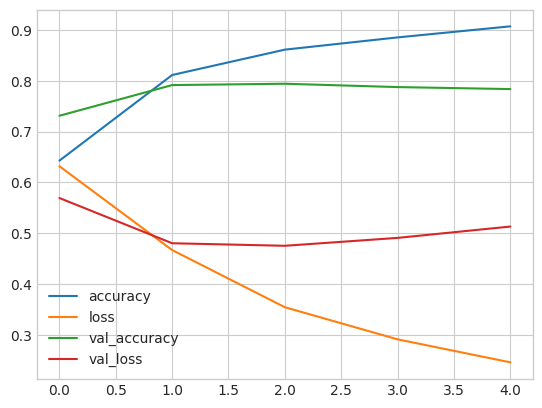

In [58]:
pd.DataFrame(model_two_history.history).plot()

In [59]:
# Check the results
model_two.evaluate(val_sentences, val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7845 - loss: 0.5116


[0.513060450553894, 0.7834645509719849]

In [60]:
model_two_preds = tf.squeeze(tf.round(model_two.predict(val_sentences)))
model_two_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_two_preds)
model_two_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


{'accuracy': 78.34645669291339,
 'precision': 0.7849546662893069,
 'recall': 0.7834645669291339,
 'f1': 0.7808371619686287}

#### Model Three (LSTM)

In [61]:
from keras.models import Sequential,Model
from keras.layers import Input,GlobalAveragePooling1D, Dense,LSTM,GRU

In [62]:
model_two_embedding = layers.Embedding(input_dim = max_vocab_length, output_dim = 128, input_shape = (avg_words,1),embeddings_initializer="uniform",)

inputs = Input(shape = (1,), dtype="string")
x = text_vectorizer(inputs)
x = model_two_embedding(x)
# x = layers.LSTM(64,return_sequences = True)(x)
x = LSTM(64)(x)
x = Dense(128,activation="relu")(x)
outputs = Dense(1,activation="sigmoid")(x)
model_three = Model(inputs,outputs,name = "LSTM")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model_three.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_three.fit(train_sentences,train_labels,epochs=5,validation_data = (val_sentences,val_labels))

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6566 - loss: 0.5976 - val_accuracy: 0.7861 - val_loss: 0.4801
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8642 - loss: 0.3374 - val_accuracy: 0.7795 - val_loss: 0.5149
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9138 - loss: 0.2277 - val_accuracy: 0.7612 - val_loss: 0.6365
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9545 - loss: 0.1421 - val_accuracy: 0.7625 - val_loss: 0.9240
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9613 - loss: 0.1309 - val_accuracy: 0.7664 - val_loss: 0.8428


In [64]:
def get_model_results(model):
    model_preds = tf.squeeze(tf.round(model.predict(val_sentences)))
    model_results = calculate_results(y_true=val_labels,y_pred=model_preds)
    return model_results

In [65]:
model_three_results = get_model_results(model_three)
model_three_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


{'accuracy': 76.64041994750657,
 'precision': 0.7679496844809294,
 'recall': 0.7664041994750657,
 'f1': 0.7631600219586131}

#### Model Four (GRU)

In [66]:
model_four_embedding = layers.Embedding(input_dim = max_vocab_length, output_dim = 128, input_shape = (avg_words,1),embeddings_initializer="uniform",)

inputs = Input(shape = (1,),dtype="string")
x = text_vectorizer(inputs)
x = model_four_embedding(x)
x = GRU(64)(x)
outputs = Dense(1,activation='sigmoid')(x)

model_four = Model(inputs,outputs,name = "gru")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model_four.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ['accuracy'])

In [68]:
model_four_history = model_four.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6256 - loss: 0.6277 - val_accuracy: 0.7887 - val_loss: 0.4764
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8485 - loss: 0.3637 - val_accuracy: 0.7703 - val_loss: 0.5201
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9101 - loss: 0.2397 - val_accuracy: 0.7651 - val_loss: 0.6672
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9360 - loss: 0.1905 - val_accuracy: 0.7559 - val_loss: 0.6680
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9455 - loss: 0.1663 - val_accuracy: 0.7402 - val_loss: 0.7490


In [69]:
model_four_results = get_model_results(model_four)
model_four_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


{'accuracy': 74.01574803149606,
 'precision': 0.7405102414888409,
 'recall': 0.7401574803149606,
 'f1': 0.7403134090347672}

#### Model Five (Fine tuning BERT)

In [55]:
import transformers
from transformers import BertTokenizer
from transformers import TFAutoModel
from transformers import RobertaTokenizer, TFRobertaModel
import tensorflow as tf
from tokenizers import BertWordPieceTokenizer

In [57]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    Encoder for encoding the text into sequence of integers for BERT Input
    """
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [59]:
#IMP DATA FOR CONFIG
AUTO = tf.data.experimental.AUTOTUNE
# Configuration
EPOCHS = 3
BATCH_SIZE = 16
MAX_LEN = 192

In [56]:
# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=False)
fast_tokenizer

Tokenizer(vocabulary_size=119547, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=False, wordpieces_prefix=##)

In [ ]:
train_sentences, val_sentences, train_labels, val_labels

array(['courageous honest analysis need use atomic bomb    hiroshima japanese military refuse surrender',
       'wld b shame golf cart engulf flame boycottbear',
       'tell rescind medal honor soldier massacre wound knee sign    rt',
       ...,
       'omron hemc automatic blood pressure monitor standard large bp cuff',
       'official quarantine place alabama home possible ebola case develop symptom',
       'england year ago today whirlwind time'], dtype='<U137')

In [78]:
x_train = fast_encode(train_sentences.astype(str), fast_tokenizer, maxlen=MAX_LEN)
x_valid = fast_encode(val_sentences.astype(str), fast_tokenizer, maxlen=MAX_LEN)
x_test = fast_encode(test_df.text.astype(str), fast_tokenizer, maxlen=MAX_LEN)

y_train = train_labels.values
y_valid = val_labels.values

TypeError: BaseTokenizer.enable_padding() got an unexpected keyword argument 'max_length'

In [77]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,happen terrible car crash
1,2,NaN,NaN,hear earthquake different city stay safe
2,3,NaN,NaN,forest fire spot pond geese flee street save
3,9,NaN,NaN,apocalypse light spokane wildfire
4,11,NaN,NaN,typhoon soudelor kill china taiwan
...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles uo safety fasten...
3259,10865,NaN,NaN,storm ri worse hurricane cityother hard hit ya...
3260,10868,NaN,NaN,green line derailment chicago
3261,10874,NaN,NaN,meg issue hazardous weather outlook hwo


In [80]:
import transformers
from transformers import BertTokenizer
from transformers import TFAutoModel
from transformers import RobertaTokenizer, TFRobertaModel
import tensorflow as tf

In [81]:
def map_func(input_ids, masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': masks
    }, labels

In [82]:
seq_len = 256
batch_size = 16
num_samples = len(train_df)
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'

tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

def prepare_dataset(model_name,tokenizer):
    
    train_tokens = tokenizer(
    train_df['text'].tolist(), 
    max_length=seq_len, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True, 
    return_tensors='np'
    )
    
    y_train = train_df['target'].values
    labels = np.zeros((num_samples, y_train.max() + 1))
    labels[np.arange(num_samples), y_train] = 1
    
    dataset = tf.data.Dataset.from_tensor_slices(
    (
        train_tokens['input_ids'], 
        train_tokens['attention_mask'], 
        labels
    )
    )

    dataset = dataset.map(map_func)
    dataset = dataset.shuffle(10000).batch(batch_size=batch_size, drop_remainder=True)

    split = 0.7
    size = int((train_tokens['input_ids'].shape[0] // batch_size) * split)

    train_ds = dataset.take(size)
    val_ds = dataset.skip(size)
    return (train_ds,val_ds)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [83]:
(train_ds,val_ds) = prepare_dataset(model_name,tokenizer)

In [90]:
def create_model(model_name):
    model = TFAutoModel.from_pretrained(model_name)
    
    # Two inputs
    input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
    mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')
    
    # embeddings = model.bert(input_ids, attention_mask=mask)[1]
    embeddings = model(input_ids, attention_mask=mask)[0]
    cls_token = embeddings[:, 0, :]
    
    # Classifier head
    x = tf.keras.layers.BatchNormalization()(cls_token)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    y = tf.keras.layers.Dense(2, activation='softmax', name='outputs')(x)
    
    bert_model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.CategoricalCrossentropy()
    acc = tf.keras.metrics.BinaryAccuracy()
    
    bert_model.compile(optimizer=optimizer, loss=loss, metrics=[acc])
    
    return bert_model

In [91]:
bert_model = create_model(model_name)
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.1, min_delta=0.001, monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, monitor='val_loss')
]


Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [92]:
model_five_history = bert_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10


I0000 00:00:1713460273.882223      99 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


332/332 [==============================] - 377s 925ms/step - loss: 0.5328 - binary_accuracy: 0.7526 - val_loss: 0.3833 - val_binary_accuracy: 0.8378 - lr: 1.0000e-05
Epoch 2/10
332/332 [==============================] - 303s 912ms/step - loss: 0.4372 - binary_accuracy: 0.8151 - val_loss: 0.3448 - val_binary_accuracy: 0.8540 - lr: 1.0000e-05
Epoch 3/10
332/332 [==============================] - 304s 915ms/step - loss: 0.3874 - binary_accuracy: 0.8328 - val_loss: 0.3132 - val_binary_accuracy: 0.8711 - lr: 1.0000e-05
Epoch 4/10
332/332 [==============================] - 304s 916ms/step - loss: 0.3583 - binary_accuracy: 0.8513 - val_loss: 0.3406 - val_binary_accuracy: 0.8632 - lr: 1.0000e-05
Epoch 5/10
332/332 [==============================] - 304s 917ms/step - loss: 0.3298 - binary_accuracy: 0.8654 - val_loss: 0.2296 - val_binary_accuracy: 0.9052 - lr: 1.0000e-05
Epoch 6/10
332/332 [==============================] - 305s 920ms/step - loss: 0.2976 - binary_accuracy: 0.8771 - val_loss: 0.1

In [94]:
bert_model.save_weights("roberta-base.h5")

In [101]:
test_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256), dtype=tf.int32, name=None), TensorSpec(shape=(None, 256), dtype=tf.int32, name=None))>

In [100]:
test_tokens = tokenizer(
    test_df['text'].tolist(), 
    max_length=seq_len, 
    truncation=True, 
    padding='max_length', 
    return_tensors='tf'
)

test_ds = tf.data.Dataset.from_tensor_slices((test_tokens['input_ids'], test_tokens['attention_mask']))
test_ds = test_ds.batch(batch_size)

# Make predictions
predictions = bert_model.predict(test_ds)

# # Assuming binary classification
# predicted_labels = np.argmax(predictions, axis=1)

# # Assuming `predicted_labels` are the predicted labels and `test_df['target']` are the true labels
# accuracy = np.mean(predicted_labels == test_df['target'])
# print("Accuracy:", accuracy)

ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py", line 2436, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py", line 2409, in run_step  *
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py", line 2377, in predict_step  *
        return self(x, training=False)
    File "/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/base_layer.py", line 998, in error_handler  *
        return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py", line 588, in __call__  *
        return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/base_layer.py", line 998, in error_handler  *
        return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/base_layer.py", line 1103, in __call__  *
        input_spec.assert_input_compatibility(
    File "/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/input_spec.py", line 219, in assert_input_compatibility  *
        raise ValueError(

    ValueError: Layer "model_4" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 256) dtype=int32>]


In [ ]:
def prep_data(text):
    tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
    tokens = tokenizer(
        text, max_length=256, truncation=True, 
        padding='max_length', 
        add_special_tokens=True, 
        return_tensors='tf'
    )
    return {
        'input_ids': tokens['input_ids'], 
        'attention_mask': tokens['attention_mask']
    }

test_df['target'] = None

for i, row in test_df.iterrows():
    tokens = prep_data(row['text'])
    probs = bert_model.predict_on_batch(tokens)
    pred = np.argmax(probs)
    test_df.at[i, 'target'] = pred
    
test_df['target'] = test_df['target'].astype(int)

In [ ]:
test_df.head()

In [ ]:
sample_sub = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

In [ ]:
sub = pd.DataFrame({'id':sample_sub['id'].values.tolist(), 'target':test_df['target']})
sub.to_csv('submission.csv', index=False)